In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
base = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Cereal%20Nutrition/cereal.csv")
base.drop_duplicates()
base.dropna()
base.info()
base.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
base2 = base.drop('name', axis = 1)
base2 = base2.drop('mfr', axis = 1)
base2 = base2.drop('type', axis = 1)
base2 = base2.drop('rating', axis = 1)
base2

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [4]:
work_base = base2.values[:, 0:]
work_base = (work_base - work_base.mean(axis = 0)) / work_base.std(axis = 0)
work_base

array([[-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
        -3.56305633e-01,  3.31443928e+00, -2.25763865e+00,
        -2.08807273e-01,  2.59694789e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -2.12387042e+00],
       [ 6.77623471e-01,  4.17912310e-01,  3.98734926e+00,
        -1.73708742e+00, -6.41716689e-02, -1.55193563e+00,
         2.44098644e-01,  5.49573000e-01, -1.27255013e+00,
         9.57813297e-01, -1.98067464e-01,  7.74052748e-01],
       [-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
         1.20457813e+00,  2.89211291e+00, -1.78716997e+00,
        -4.35260232e-01,  3.16174096e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -2.12387042e+00],
       [-2.93860476e+00,  1.33731939e+00, -1.01307245e+00,
        -2.36237652e-01,  5.00374475e+00, -1.55193563e+00,
        -1.56752502e+00,  3.30293923e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -1.38857648e+00],
       [ 1.61019439e-01, -5.01494772e-01,  9.8709623

In [5]:
work_base.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
from sklearn.preprocessing import StandardScaler # For Mx=0 and Dx=1
X = base2.values[:, 0:]
work_base = StandardScaler().fit_transform(X)
work_base

array([[-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
        -3.56305633e-01,  3.31443928e+00, -2.25763865e+00,
        -2.08807273e-01,  2.59694789e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -2.12387042e+00],
       [ 6.77623471e-01,  4.17912310e-01,  3.98734926e+00,
        -1.73708742e+00, -6.41716689e-02, -1.55193563e+00,
         2.44098644e-01,  5.49573000e-01, -1.27255013e+00,
         9.57813297e-01, -1.98067464e-01,  7.74052748e-01],
       [-1.90539669e+00,  1.33731939e+00, -1.29881083e-02,
         1.20457813e+00,  2.89211291e+00, -1.78716997e+00,
        -4.35260232e-01,  3.16174096e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -2.12387042e+00],
       [-2.93860476e+00,  1.33731939e+00, -1.01307245e+00,
        -2.36237652e-01,  5.00374475e+00, -1.55193563e+00,
        -1.56752502e+00,  3.30293923e+00, -1.46270130e-01,
         9.57813297e-01, -1.98067464e-01, -1.38857648e+00],
       [ 1.61019439e-01, -5.01494772e-01,  9.8709623

[[14.         18.          0.14119827  2.        ]
 [15.         62.          0.18534635  2.        ]
 [64.         65.          0.55985941  2.        ]
 [44.         45.          0.6603739   2.        ]
 [16.         78.          0.86444105  3.        ]]


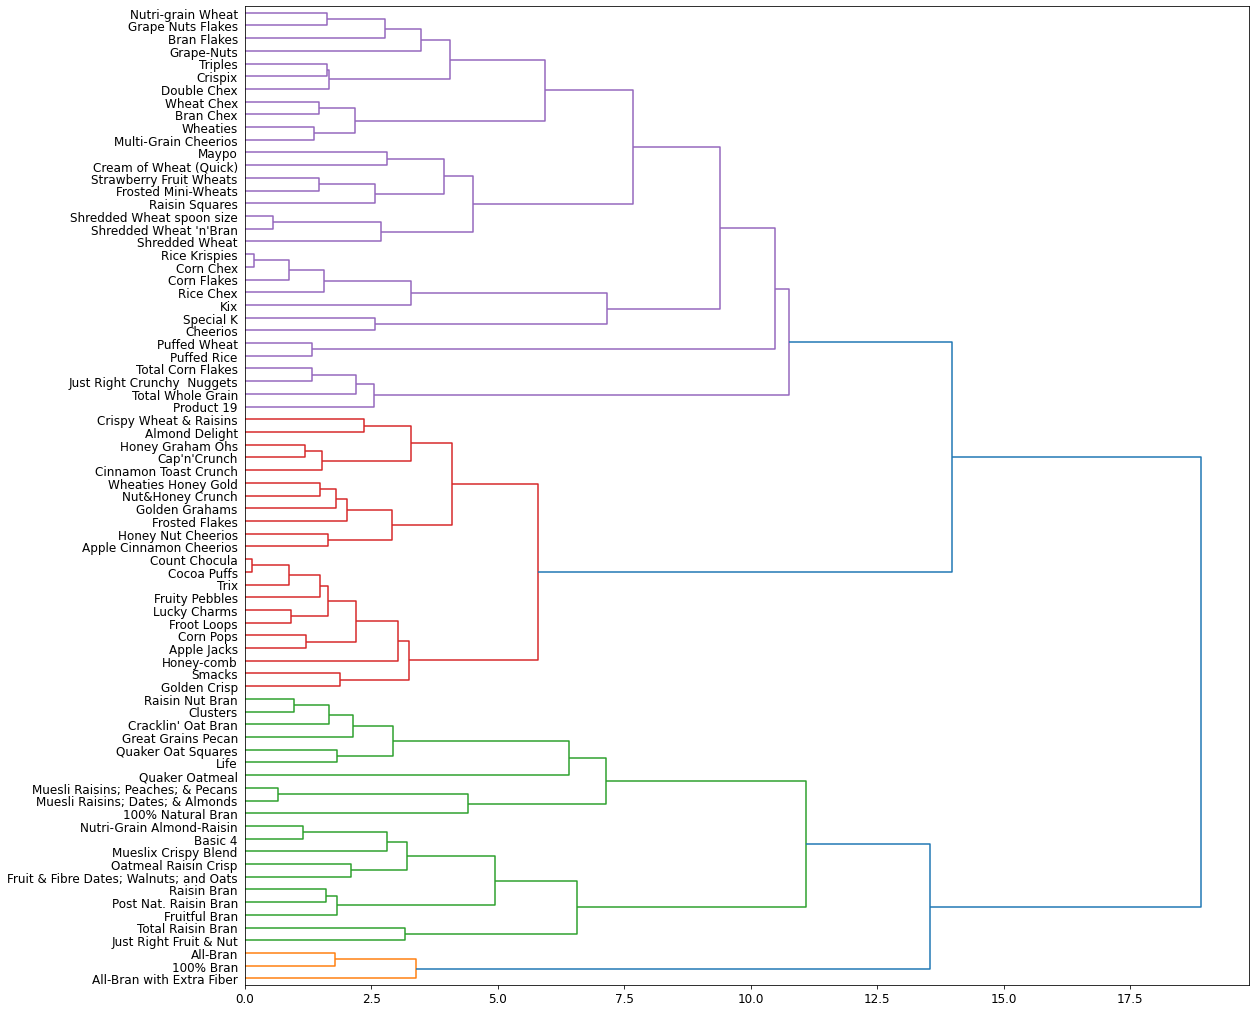

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(work_base, method = 'ward', metric = 'euclidean') # 1 obj, 2 obj, dist, number of objects in a cluster
print(link[:5])
fig = plt.figure(figsize=(18,18))
dend = dendrogram(link, orientation = 'right', labels = base.name.values)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

In [8]:
base2 = base
base2['cluster'] = fcluster(link, 12.2, criterion = 'distance')
base2.groupby('cluster').mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
cluster,,,,,,,,,,,,,
1,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.0000,3.000000,1.000000,0.386667,73.844463
2,124.000000,3.300000,2.000000,148.000000,3.135000,13.350000,8.800000,151.000000,30.0000,2.800000,1.172500,0.688500,38.994222
3,110.909091,1.545455,1.045455,170.000000,0.590909,12.500000,11.318182,45.181818,25.0000,1.818182,1.000000,0.869545,28.921286
4,97.500000,2.625000,0.406250,158.281250,1.781250,17.562500,3.031250,76.687500,29.6875,2.031250,0.963437,0.911250,51.486661


In [9]:
for i, group in base2.groupby('cluster'):
    print('=' * 80)
    print('cluster ', i)
    print(group)

cluster  1
                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  cluster  
0    5.0       6     280        25      3     1.0  0.33  68.402973        1  
2    7.0       5     320        25      3     1.0  0.33  59.425505        1  
3    8.0       0     330        25      3     1.0  0.50  93.704912        1  
cluster  2
                                      name mfr type  calories  protein  fat  \
1                        100% Natural Bran   Q    C       120        3    5   
7                                  Basic 4   G    C       130        3    2   
13                                Clusters   G    C       110        3    2   
19                      Crack

In [10]:
from sklearn.cluster import KMeans
k_means = KMeans(init = 'k-means++', n_clusters = 4, random_state = 42, n_init = 12).fit(work_base)
clust_K_means = k_means.labels_
print(clust_K_means)

[2 3 2 2 1 1 1 3 1 2 1 1 1 3 1 1 1 1 1 3 0 1 1 1 1 1 0 3 3 1 1 1 1 3 3 1 1
 1 1 3 1 3 1 0 3 3 3 1 1 3 0 3 3 1 0 0 3 0 3 3 0 1 1 0 0 0 1 0 0 1 3 1 1 1
 1 1 1]


In [11]:
base['cluster'] = clust_K_means
base.groupby('cluster').mean()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
cluster,,,,,,,,,,,,,
0,87.692308,3.00,0.230769,38.076923,2.053846,14.769231,1.923077,82.230769,11.538462,1.923077,0.9100,0.87000,61.177072
1,108.000000,1.95,0.875000,198.250000,0.950000,15.350000,7.800000,55.225000,32.500000,1.875000,1.0000,0.91825,35.817077
2,70.000000,3.75,0.500000,185.000000,9.500000,8.250000,4.000000,280.000000,25.000000,3.000000,1.0000,0.45750,68.711801
3,124.500000,3.20,1.900000,156.500000,3.150000,14.250000,9.000000,150.000000,31.250000,2.900000,1.1725,0.66750,39.121353


In [12]:
k_means.cluster_centers_

array([[-0.99140494,  0.41791231, -0.78228376, -1.46000746, -0.04143102,
         0.04041989, -1.13203857, -0.1955194 , -0.75272859, -0.34423303,
        -0.80008831,  0.21176915],
       [ 0.05769863, -0.54746513, -0.13799865,  0.46315834, -0.50761436,
         0.17703675,  0.19880805, -0.57683618,  0.19161387, -0.40236009,
        -0.19806746,  0.42046287],
       [-1.90539669,  1.10746762, -0.51303028,  0.30406826,  3.10327609,
        -1.49312705, -0.66171319,  2.59694789, -0.14627013,  0.9578133 ,
        -0.19806746, -1.57239997],
       [ 0.91009529,  0.60179373,  0.8870878 , -0.03812548,  0.42150365,
        -0.08172102,  0.4705516 ,  0.7613704 ,  0.13529987,  0.836909  ,
         0.95580582, -0.66409569]])

In [13]:
new_item = [[120, 2, 0, 180, 0.5, 8.4, 90, 77, 1, 2, 0, 0]]
k_means.predict(new_item)

array([3], dtype=int32)

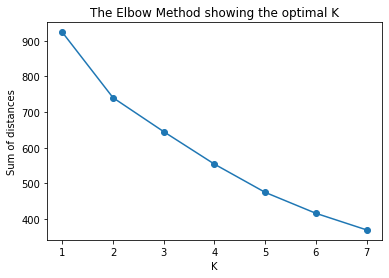

In [14]:
K = range (1, 8) 
k_means = [KMeans(n_clusters = k,init = 'k-means++', random_state = 3).fit(work_base) for k in K]
dist = [model.inertia_ for model in k_means] 
plt.plot(K, dist, marker = 'o')
plt.xlabel('K')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [16]:
base.groupby("cluster").size()

cluster
0    13
1    40
2     4
3    20
dtype: int64